1)

a) Plot the sigmoid function. Print your interpretation on why this function is useful for a classification problem.

b) Implement Logistic regression using the data provided (Logistic_regression_ls.csv) and plot the decision boundary (linear).



In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
def sigmoid(z):
    return 1/(1 + np.e**(-1*z))

In [4]:
np.e

2.718281828459045

Text(0, 0.5, 'sigma(z)')

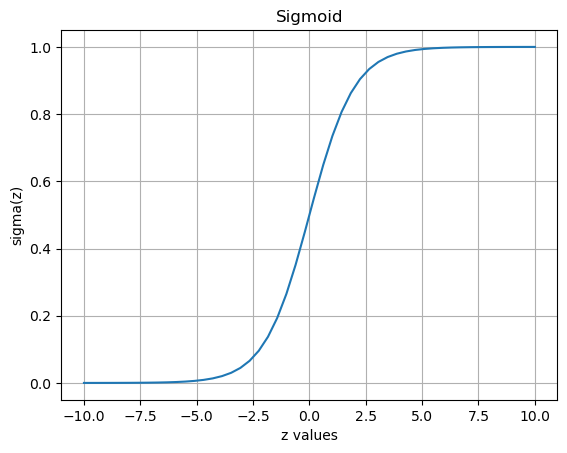

In [5]:
z = np.linspace(-10, 10)
ax = plt.axes()
ax.plot(z, sigmoid(z))
ax.grid()
ax.set_title('Sigmoid')
ax.set_xlabel('z values')
ax.set_ylabel('sigma(z)')

The sigmoid function is often used in classification problems because it maps any real-valued number to a probability value between 0 and 1, which is useful for determining the likelihood of a given input belonging to a certain class. Specifically, the sigmoid function has the property that as its input gets very large or very small, its output approaches 1 or 0, respectively. This makes it useful for binary classification tasks, where the goal is to predict whether an input belongs to one of two classes.



In [27]:
df = pd.read_csv('Logistic_regression_ls.csv')
df

,x1,x2,label
0,7.395,7.638,1
1,4.987,6.485,1
2,5.358,6.499,1
3,2.036,2.380,0
4,5.956,7.378,1
...,...,...,...
495,0.304,1.608,0
496,6.140,4.261,1
497,6.579,6.231,1
498,2.555,0.446,0


In [7]:
def j(w0,w1,w2,x1,x2,y):
    j = 0
    for i in range (len(y)):
        j+= -y[i]*np.log(sigmoid(w0+w1*x1[i]+w2*x2[i]))-(1-y[i])*np.log(1-sigmoid (w0+w1*x1[i]+w2*x2[i]))
    j = j/len(y)
    return j

    def Djw0(w0,w1,w2,x1,x2,y):
        j=0
        for i in range(len(y)):
            j+=(sigmoid(w0+w1*x1[i]+w2*x2[i])-y[i])
        j = j/len(y)
        return j

    def Djw1(w0,w1,w2,x1,x2,y):
        j=0
        for i in range(len(y)): 
            j+=(sigmoid(w0+w1*x1[i]+w2*x2[i])-y[i])*x1[i]
        j = j/len(y)
        return j

def Djw2(we, w1, w2,x1,x2,y):
    j = 0
    for i in range(len(y)):
        j+=(sigmoid (we+w1*x1[i]+w2*x2[i])-y[i])*x2[i]
    j=j/len(y)
    return j

In [8]:
def logistic_reg(w0,w1,w2,x1,x2,y,e):
    alpha =0.15
    cost =[]
    ite = 0 
    for i in range(100):
        if(abs(Djw0(w0,w1,w2,x1,x2,y))>=e and abs(Djw1(w0,w1,w2,x1,x2,y))>=e and abs(Djw2(w0,w1,w2,x1,x2,y))>=e):
            cost.append(j(w0,w1,w2,x1,x2,y))
            djw0=Djw0(w0,w1,w2,x1,x2,y)
            djw1=Djw1(w0,w1,w2,x1,x2,y)
            djw2 = Djw2(w0,w1,w2,x1,x2,y)
            w0 = w0-alpha*djw0
            w1 = w1-alpha*djw1
            w2 = w2-alpha*djw2
        else:
            break 
        ite+=1
    iterations=np.arange(0,ite,1)
    plt.title('cost function vs iterations')
    plt.plot(iterations,cost)
    plt.xlabel('iterations')
    plt.ylabel('cost function')
    return w0,w1,w2

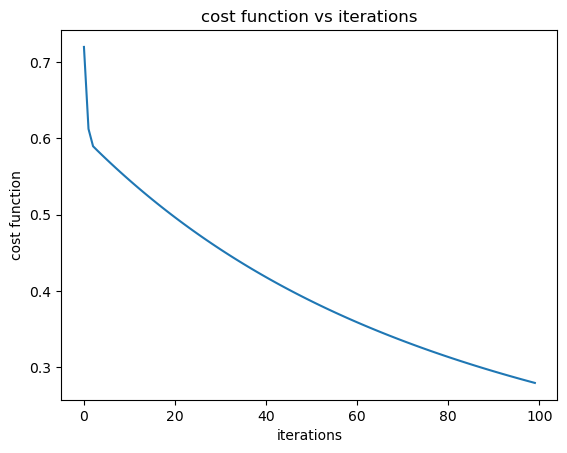

In [9]:
w0=0.1
e = 10**-6
w1,w2 =0.2,0.3
x1=df['x1'] 
x2=df['x2']
y=df['label']
(w0,w1,w2) =logistic_reg(w0,w1,w2,x1,x2,y,e)


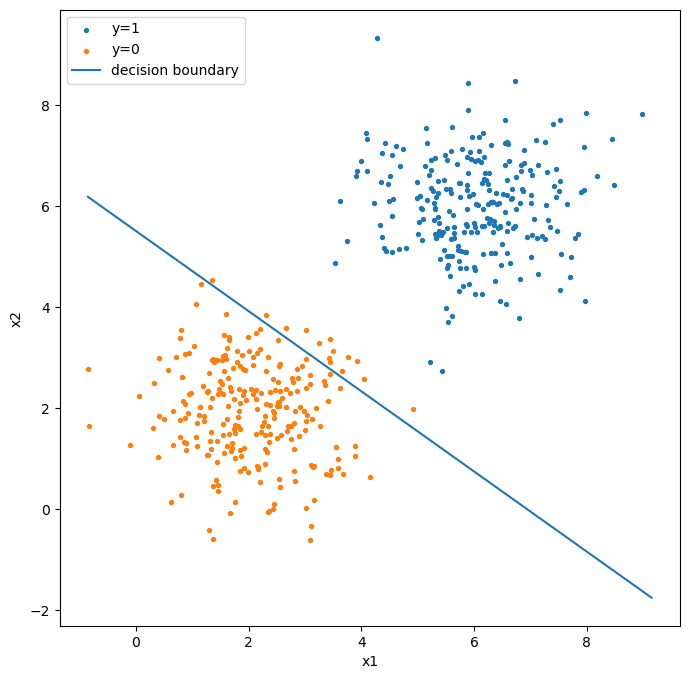

In [10]:
X_1 = np.arange(min(df['x1']),max(df['x2']))
X_2 = []
for val in X_1:
    X_2.append(-(w0+w1*val)/w2)
true_vals = df.loc[y==1]
false_vals = df.loc[y==0]
plt.figure(figsize=(8,8))
plt.scatter(true_vals.iloc[:,0], true_vals.iloc[:,1], s=8, label = 'y=1')
plt.scatter(false_vals.iloc[:,0], false_vals.iloc[:,1], s=8, label = 'y=0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(X_1,X_2, label = 'decision boundary')
plt.legend()
plt.show()